In [11]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import plotly.graph_objects as go


import chart_studio.plotly as ply
import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode, plot
init_notebook_mode(connected=True)
cf.go_offline()

In [13]:
df_1 = pd.read_excel('data_1.xlsx',skiprows=16)
df_1.head()

,From Date,To Date,CO,Ozone
0,01-01-2021 00:00,01-01-2021 08:00,0.71,78.94
1,01-01-2021 08:00,01-01-2021 16:00,0.94,72.82
2,01-01-2021 16:00,02-01-2021 00:00,1.13,75.24
3,02-01-2021 00:00,02-01-2021 08:00,0.87,84.73
4,02-01-2021 08:00,02-01-2021 16:00,1.01,67.93


In [14]:
df_1.shape

(1094, 4)

In [15]:
df_2 = pd.read_excel('data_2.xlsx',skiprows=16)
df_2.head()

,From Date,To Date,PM2.5,PM10,SO2,NO2,NH3
0,01-01-2021 00:00,02-01-2021 00:00,64.06,103.75,14.68,16.61,32.00
1,02-01-2021 00:00,03-01-2021 00:00,84.60,116.47,11.63,15.32,33.03
2,03-01-2021 00:00,04-01-2021 00:00,105.65,133.72,11.98,13.71,33.75
3,04-01-2021 00:00,05-01-2021 00:00,42.95,92.75,9.36,10.94,31.19
4,05-01-2021 00:00,06-01-2021 00:00,35.41,82.37,11.55,14.62,31.17


In [16]:
df_2.shape

(365, 7)

<Axes: >

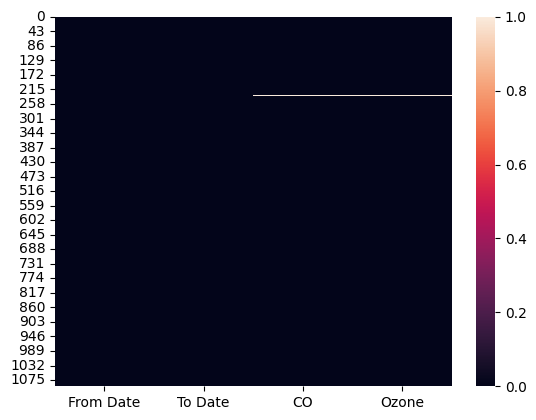

In [17]:
### Check for null values

sns.heatmap(df_1.isnull())

In [18]:
df_2.isnull().any()

From Date    False
To Date      False
PM2.5        False
PM10         False
SO2          False
NO2          False
NH3          False
dtype: bool

In [19]:
df_1['From Date'] = pd.to_datetime(df_1['From Date'],format='%d-%m-%Y %H:%M')
df_1['From Date'] = pd.to_datetime(df_1['From Date']).dt.date

df_1['To Date'] = pd.to_datetime(df_1['To Date'],format='%d-%m-%Y %H:%M')
df_1['To Date'] = pd.to_datetime(df_1['To Date']).dt.date

df_1.head()

,From Date,To Date,CO,Ozone
0,2021-01-01,2021-01-01,0.71,78.94
1,2021-01-01,2021-01-01,0.94,72.82
2,2021-01-01,2021-01-02,1.13,75.24
3,2021-01-02,2021-01-02,0.87,84.73
4,2021-01-02,2021-01-02,1.01,67.93


In [20]:
df_1.shape

(1094, 4)

In [21]:
df_1.CO.unique()

array([0.71, 0.94, 1.13, 0.87, 1.01, 1.32, 0.95, 1.52, 1.2 , 0.69, 0.96,
       0.86, 0.41, 0.93, 1.73, 0.64, 0.88, 0.73, 1.31, 0.79, 1.  , 1.18,
       0.75, 0.76, 0.65, 0.62, 0.34, 0.52, 0.78, 2.38, 1.4 , 2.77, 1.64,
       2.28, 3.74, 1.23, 3.33, 1.38, 1.43, 1.04, 0.91, 1.34, 1.53, 1.21,
       1.91, 1.46, 1.61, 3.59, 2.15, 1.09, 0.77, 1.06, 1.1 , 0.56, 0.82,
       0.68, 1.22, 0.85, 2.08, 0.74, 1.02, 1.26, 0.89, 1.47, 1.7 , 4.11,
       1.42, 1.11, 1.25, 1.35, 4.85, 1.99, 1.66, 1.95, 1.03, 0.8 , 0.67,
       0.54, 0.57, 3.21, 1.9 , 1.19, 3.02, 0.92, 1.27, 1.62, 1.77, 1.79,
       0.66, 3.58, 1.07, 1.33, 1.08, 0.83, 0.47, 0.84, 1.82, 1.28, 2.83,
       1.81, 2.04, 0.48, 3.06, 0.58, 2.11, 0.31, 0.26, 0.46, 0.43, 0.59,
       0.5 , 4.6 , 1.36, 0.98, 3.15, 1.96, 0.49, 0.61, 0.81, 0.35, 0.44,
       0.51, 0.55, 0.33, 0.72, 1.29, 0.4 ,  nan, 0.6 , 0.7 , 0.39, 0.63,
       1.74, 0.9 , 2.16, 0.23, 0.21, 0.32, 0.42, 0.38, 0.45, 0.22, 0.27,
       0.29, 1.98, 1.93, 0.36, 0.19, 0.2 , 1.16, 1.

In [22]:
df_1[df_1.CO=='None']

,From Date,To Date,CO,Ozone


In [23]:
df_1.Ozone.unique()

array([78.94, 72.82, 75.24, ..., 48.67, 62.53, 54.8 ])

In [24]:
df_1[df_1.Ozone=='None']

,From Date,To Date,CO,Ozone


In [25]:
df_1 = df_1.replace(['None'],0.00)

In [26]:
df_1[df_1.Ozone=='None']

,From Date,To Date,CO,Ozone


In [27]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   From Date  1094 non-null   object 
 1   To Date    1094 non-null   object 
 2   CO         1092 non-null   float64
 3   Ozone      1092 non-null   float64
dtypes: float64(2), object(2)
memory usage: 34.3+ KB


In [28]:
df_2 = pd.read_excel('data_2.xlsx',skiprows=16)
df_2.head()

,From Date,To Date,PM2.5,PM10,SO2,NO2,NH3
0,01-01-2021 00:00,02-01-2021 00:00,64.06,103.75,14.68,16.61,32.00
1,02-01-2021 00:00,03-01-2021 00:00,84.60,116.47,11.63,15.32,33.03
2,03-01-2021 00:00,04-01-2021 00:00,105.65,133.72,11.98,13.71,33.75
3,04-01-2021 00:00,05-01-2021 00:00,42.95,92.75,9.36,10.94,31.19
4,05-01-2021 00:00,06-01-2021 00:00,35.41,82.37,11.55,14.62,31.17


In [29]:
df_2.shape

(365, 7)

In [30]:
df_2.isnull().any()

From Date    False
To Date      False
PM2.5        False
PM10         False
SO2          False
NO2          False
NH3          False
dtype: bool

In [31]:
df_2['From Date'] = pd.to_datetime(df_2['From Date'],format='%d-%m-%Y %H:%M')
df_2['From Date'] = pd.to_datetime(df_2['From Date']).dt.date

df_2['To Date'] = pd.to_datetime(df_2['To Date'],format='%d-%m-%Y %H:%M')
df_2['To Date'] = pd.to_datetime(df_2['To Date']).dt.date

df_2.head()

,From Date,To Date,PM2.5,PM10,SO2,NO2,NH3
0,2021-01-01,2021-01-02,64.06,103.75,14.68,16.61,32.00
1,2021-01-02,2021-01-03,84.60,116.47,11.63,15.32,33.03
2,2021-01-03,2021-01-04,105.65,133.72,11.98,13.71,33.75
3,2021-01-04,2021-01-05,42.95,92.75,9.36,10.94,31.19
4,2021-01-05,2021-01-06,35.41,82.37,11.55,14.62,31.17


In [33]:
df_12 = df_1.groupby(["From Date"],as_index=False).mean()
df_12.head()

TypeError: unsupported operand type(s) for +: 'datetime.date' and 'datetime.date'

In [ ]:
df_12.shape

In [34]:
# Forming our main dataset

df = pd.merge(df_2,df_12,on='From Date')
df.head()

NameError: name 'df_12' is not defined

In [ ]:
df.shape

In [ ]:
sns.heatmap(df.corr(),annot=True)

# Data Visualization

In [ ]:
df.plot()

In [ ]:
df.columns

In [ ]:
px.line(df,x='From Date',y='PM2.5',labels={'x':'Date','y':'PM2.5'},title='Datewise PM2.5 variation in air')

In [ ]:
px.line(df,x='From Date',y='PM10',labels={'x':'Date','y':'PM10'},title='Datewise PM10 variation in air')

In [ ]:
px.line(df,x='From Date',y='SO2',labels={'x':'Date','y':'SO2'},title='Datewise SO2 variation in air')

In [ ]:
px.line(df,x='From Date',y='NO2',labels={'x':'Date','y':'NO2'},title='Datewise NO2 variation in air')

In [ ]:
px.line(df,x='From Date',y='NH3',labels={'x':'Date','y':'NH3'},title='Datewise NH3 variation in air')

In [ ]:
px.line(df,x='From Date',y='CO',labels={'x':'Date','y':'CO'},title='Datewise CO variation in air')

In [ ]:
px.line(df,x='From Date',y='Ozone',labels={'x':'Date','y':'Ozone'},title='Datewise Ozone variation in air')

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['From Date'],y=df['PM2.5'],mode='lines',name='PM2.5'))
fig.add_trace(go.Scatter(x=df['From Date'],y=df['PM10'],mode='lines+markers',name='PM10'))
fig.add_trace(go.Scatter(x=df['From Date'],y=df.SO2,mode='lines+markers',name='SO2',line=dict(color='firebrick',
                                                                                                    width=3,dash='dashdot')))

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['From Date'],y=df.Ozone,mode='lines',name='Ozone(O3)'))
fig.add_trace(go.Scatter(x=df['From Date'],y=df.NH3,mode='lines+markers',name='NH3'))

In [ ]:
px.histogram(df,x='CO')

In [ ]:
px.histogram(df,x='NO2')

In [ ]:
px.histogram(df,x='SO2')

In [ ]:
px.histogram(df,x='PM2.5')

In [ ]:
px.histogram(df,x='PM10')

In [ ]:
type(df['From Date'][1]) 

In [ ]:
df_new = df
df_new.head()

In [ ]:
df_new.shape

In [ ]:
df_new.drop(['To Date'],inplace=True,axis=1)
df_new.head()

In [ ]:
df_new.rename({'From Date':'Date'},inplace=True)
df_new.head()

In [ ]:
type(df_new['From Date'][1])

In [ ]:
df_new['Day'] = df_new.index+1
df_new['Year'] = df_new['From Date'].dt.year
df_new['Month'] = df_new['From Date'].dt.month
df_new.head()

In [ ]:
df['From Date'] = pd.to_datetime(df['From Date'],format='%Y-%m-%d')

df.head()

In [ ]:
df_new['Year'] = df_new['From Date'].dt.year
df_new['Month'] = df_new['From Date'].dt.month
df_new.head()

In [ ]:
df_new.Year.unique()

In [ ]:
df_new.Month.unique()

In [ ]:
df_new.Day.unique()

In [ ]:
df_new['Date'] = df_new['From Date'].dt.date
df_new.head()

In [ ]:
df_new.drop('From Date',inplace=True,axis=1)
df_new.head()

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(df.CO[(df.Year==2021) & (df.Month==1)])
plt.title('CO-emission data of Januray,2020')
plt.show()

In [ ]:
# Let's build a function for month-wise CO emission data

def func_CO(y,m):
    fig,ax = plt.subplots(figsize=(5,5))
    sns.histplot(df.CO[(df.Year==y) & (df.Month==m)])
    
    if m==1:
        m='January'
    elif m==2:
        m='February'
    elif m==3:
        m='March'
    elif m==4:
        m='April'
    elif m==5:
        m='May'
    elif m==6:
        m='June'
    elif m==7:
        m='July'
    elif m==8:
        m='August'
    elif m==9:
        m='September'
    elif m==10:
        m='October'
    elif m==11:
        m='November'
    else:
        m='December'
        
        
    plt.title('CO-emission data for {}, {}'.format(m,y))
    plt.show() 

In [ ]:
func_CO(2021,9)

In [ ]:
px.bar(df.CO,df.Month)

In [ ]:
px.histogram(df.CO[(df.Year==2021) & (df.Month==1)],nbins=10,title='CO-emission data of Januray,2021')

### Creating the function to calculate Air Quality Index

In [ ]:
# for PM 2.5

def cal_index_25(PMii):
    i_1=0
    if(PMii<=30):
        i_1=PMii*(50/30)
    elif(PMii>30 and PMii<=60):
        i_1=50+(PMii-30)*(50/30)
    elif(PMii>60 and PMii<=90):
        i_1=100+(PMii-60)*(100/30)
    elif(PMii>90 and PMii<=120):
        i_1=200+(PMii-90)*(100/30)
    elif(PMii>120 and PMii<=250):
        i_1=300+(PMii-120)*(100/130)
    else:
        i_1=400+(PMii-250)*(100/130)
    return i_1
df_new["PM2.5_index"] = df_new["PM2.5"].apply(cal_index_25)

In [ ]:
# for PM10

def cal_index_10(PMix):
    i_2=0
    if(PMix<=50):
        i_2 = PMix*(50/50)
    elif(PMix>50 and PMix<=100):
        i_2 = 50+(PMix-50)*(50/50)
    elif(PMix>100 and PMix<=250):
        i_2 = 100+(PMix-100)*(100/150)
    elif(PMix>250 and PMix<=350):
        i_2 = 200+(PMix-250)*(100/100)
    elif(PMix>350 and PMix<=430):
        i_2 = 300+(PMix-350)*(100/80)
    else:
        i_2 = 400+(PMix-430)*(100/80)
    return i_2
df_new["PM10_index"] = df_new["PM10"].apply(cal_index_10)

In [ ]:
# For CO

def cal_index_CO(co):
    i_3=0
    if(co<=1):
        i_3= co*50/1
    elif(co>1 and co<=2):
        i_3= 50+(co-1)*(50/1)
    elif(co>2 and co<=10):
        i_3= 100+(co-2)*(100/8)
    elif(co>10 and co<=17):
        i_3 = 200+(co-10)*(100/7)
    elif(co>17 and co<=34):
        i_3= 300+(co-17)*(100/17)
    else:
        i_3= 400+(co-34)*(100/17)
    return i_3
df_new["CO_index"] = df_new["CO"].apply(cal_index_CO)

In [ ]:
# for SO2

def cal_index_SO2(so2):
    i_4=0
    if (so2<=40):
        i_4= so2*(50/40)
    if (so2>40 and So2<=80):
        i_4= 50+(so2-40)*(50/40)
    if (so2>80 and so2<=380):
        i_4= 100+(so2-80)*(100/300)
    if (so2>380 and so2<=800):
        i_4= 200+(so2-380)*(100/800)
    if (so2>800 and so2<=1600):
        i_4= 300+(so2-800)*(100/800)
    if (so2>1600):
        i_4= 400+(SO2-1600)*(100/800)
    return i_4
df_new["SO2_index"] = df_new["SO2"].apply(cal_index_SO2)

In [ ]:
# for NO2

def cal_index_NO2(no2):
    i_5=0
    if(no2<=40):
        i_5= no2*50/40
    elif(no2>40 and no2<=80):
        i_5= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
        i_5= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
        i_5= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
        i_5= 300+(no2-280)*(100/120)
    else:
        i_5= 400+(no2-400)*(100/120)
    return i_5
df_new["NO2_index"] = df_new["NO2"].apply(cal_index_NO2)

In [ ]:
# for ozone

def cal_index_Ozone(o3):
    i_6=0
    if(o3<=50):
        i_6= o3*50/50
    elif(o3>50 and o3<=100):
        i_6= 50+(o3-50)*(50/50)
    elif(o3>100 and o3<=168):
        i_6= 100+(o3-100)*(100/68)
    elif(o3>169 and o3<=208):
        i_6= 200+(o3-169)*(100/39)
    elif(o3>208 and o3<=748):
        i_6= 300+(o3-208)*(100/540)
    else:
        i_6= 400+(o3-748)*(100/540)
    return i_6
df_new["Ozone_index"] = df_new["Ozone"].apply(cal_index_Ozone)

In [ ]:
df_new.head()

### Taking the maximum value of each row to evaluate the AQI

In [ ]:
def max_AQI(a1,a2,a3,a4,a5,a6):
    flag = max(a1,a2,a3,a4,a5,a6)
    return flag

In [ ]:
df_new['AQI']=df_new.apply(lambda x: max_AQI(x['PM2.5_index'],x['PM10_index'],x['CO_index'],x['SO2_index'], 
                                     x['NO2_index'], x['Ozone_index']),axis=1)

In [ ]:
df_new.head()

In [ ]:
# function to compute AQI-range

def AQI_Range(x):
    if x<=50:
        return "GOOD"
    elif x>50 and x<=100:
        return "SATISFACTORY"
    elif x>100 and x<=200:
        return "MODERATELY POLLUTED"
    elif x>200 and x<=300:
        return "POOR"
    elif x>300 and x<=400:
        return "VERY POOR"
    elif x>400:
        return "HAZARDOUS"
df_new["Quality"] = df_new["AQI"].apply(AQI_Range)

In [ ]:
df_new.head()